In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen
from matplotlib import pyplot as plt

In [2]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'
parser = Sbopen()
event, related, freeze, tactics = parser.event(MATCH_ID)

In [10]:
# starting players from Barcelona
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == 'Barcelona')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')

#starting_xi['player_name'] = starting_xi['player_name']
formation = event['tactics_formation'].iloc[0].astype(int).astype(str)



In [11]:
formation

'433'

In [15]:
# pomysł 2: wykorzystać podobną strukturę co w passNetwork, to nizej to inne rozwiązanie

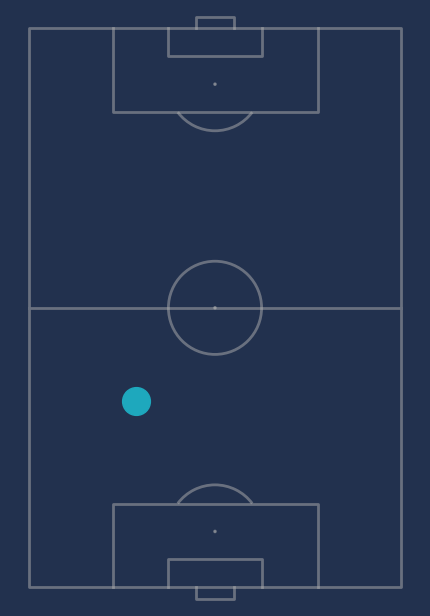

In [16]:
pitch = VerticalPitch(line_alpha=0.5, goal_type='box', goal_alpha=0.5, pitch_color= '#22314E')
fig, ax = pitch.draw(ncols=1, figsize=(4.4, 6.4))
#sc_full = pitch.formation(442, positions=starting_xi.position_id, c='#053e7a', ax=ax[0])
fig.set_facecolor('#22314E')

x = [23]
y = [40]
plt.plot(x, y, marker="o", markersize=20, markerfacecolor="#1EA8BD",markeredgecolor="#1EA8BD")
plt.show()
